In [0]:
from google.colab import files
uploaded = files.upload()

Saving bank-train.csv to bank-train.csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, datasets, linear_model, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
sns.set_style('dark')

In [0]:
data = pd.read_csv('bank-train.csv')
data.sample(5)

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2142,33070,41,entrepreneur,married,basic.9y,no,no,yes,cellular,may,mon,285,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
11910,36616,28,admin.,single,high.school,no,yes,yes,cellular,jun,thu,296,2,999,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,1
7004,25057,32,admin.,single,university.degree,no,no,no,cellular,nov,tue,398,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
21818,25433,29,management,single,university.degree,no,no,no,cellular,nov,wed,62,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0
3666,31336,37,admin.,married,university.degree,no,no,no,cellular,may,wed,305,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,0


In [0]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]
X

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,12556,40,blue-collar,married,basic.9y,unknown,yes,no,telephone,jul,mon,94,2,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1
1,35451,31,admin.,married,university.degree,no,no,no,cellular,may,mon,116,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1
2,30592,59,retired,married,basic.4y,no,no,no,cellular,may,mon,13,6,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1
3,17914,43,housemaid,divorced,basic.9y,no,yes,no,cellular,jul,tue,94,5,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1
4,3315,39,admin.,single,high.school,unknown,no,no,telephone,may,thu,344,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
5,29191,33,management,married,basic.9y,no,no,no,cellular,apr,fri,727,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
6,30549,35,admin.,married,professional.course,no,yes,no,cellular,may,mon,115,3,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1
7,6098,36,blue-collar,single,basic.9y,unknown,no,no,telephone,may,tue,201,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
8,6252,36,blue-collar,married,basic.9y,no,yes,no,telephone,may,tue,93,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
9,13373,28,technician,single,university.degree,no,yes,no,cellular,jul,wed,174,7,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1


In [0]:
XDummies = pd.get_dummies(X, drop_first=True)
XDummies = XDummies.drop('duration', axis=1)
XDummies.shape

(32950, 53)

In [0]:
logreg = LogisticRegression()
logreg.fit(XDummies, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from google.colab import files
uploaded = files.upload()

Saving bank-test.csv to bank-test (1).csv


In [0]:
test = pd.read_csv('bank-test.csv')

In [0]:
TestDummies = pd.get_dummies(test, drop_first=True)
TestDummies = TestDummies.drop('duration', axis=1)
TestDummies.shape

(8238, 52)

In [0]:
Xcolumns = set(XDummies.columns)
Testcols = set(TestDummies.columns)
Xcolumns.difference(Testcols)

{'default_yes'}

In [0]:
TestDummies['default_yes'] = np.zeros(len(TestDummies))

In [0]:
predictions = logreg.predict(TestDummies)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
submission = pd.concat([test.id, pd.Series(predictions)], axis = 1)
submission.columns = ['id', 'predicted']
submission.to_csv('submission.csv', index=False)

In [0]:
files.download('submission.csv')

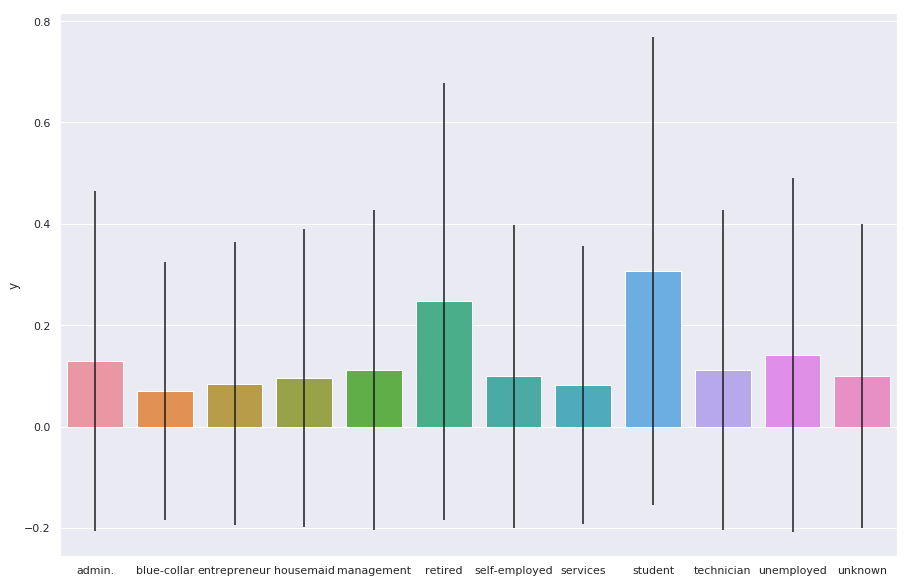

In [0]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(np.sort(data['job'].unique()), data.groupby('job')['y'].mean(), yerr = data.groupby('job')['y'].std())

In [0]:
data.groupby('job')['y'].std()

job
admin.           0.335179
blue-collar      0.254999
entrepreneur     0.278581
housemaid        0.294394
management       0.315584
retired          0.431571
self-employed    0.298620
services         0.274699
student          0.461368
technician       0.314838
unemployed       0.348862
unknown          0.299552
Name: y, dtype: float64

In [0]:
data.groupby('job')['y'].count()

job
admin.           8328
blue-collar      7439
entrepreneur     1145
housemaid         867
management       2310
retired          1363
self-employed    1153
services         3212
student           721
technician       5352
unemployed        798
unknown           262
Name: y, dtype: int64

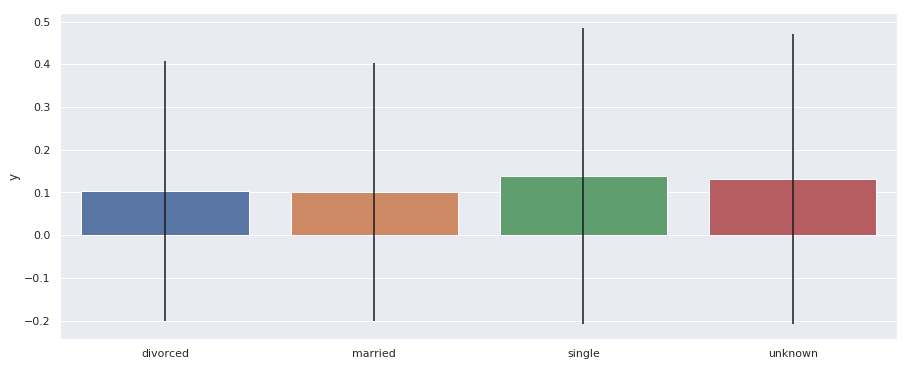

In [0]:
sns.barplot(np.sort(data['marital'].unique()), data.groupby('marital')['y'].mean(),  yerr = data.groupby('marital')['y'].std())

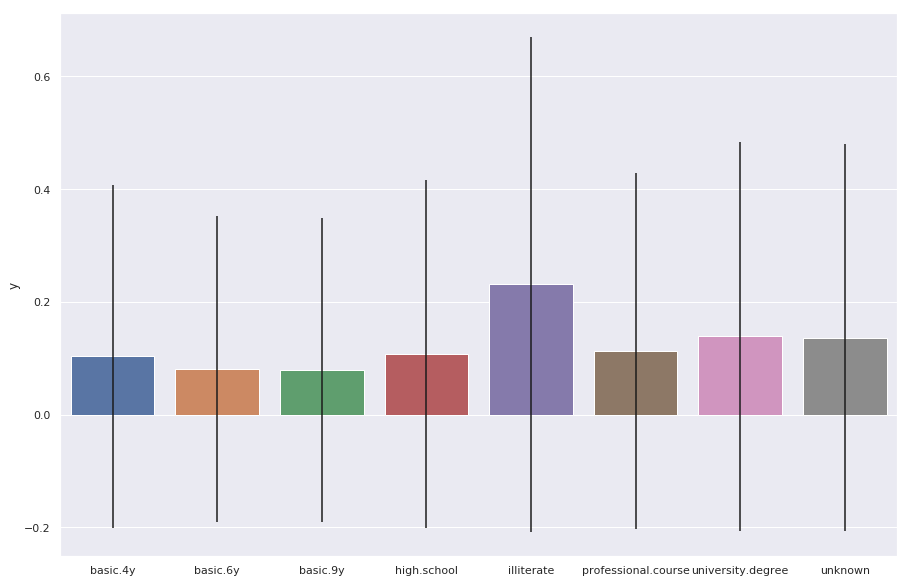

In [0]:
sns.barplot(np.sort(data['education'].unique()), data.groupby('education')['y'].mean(), yerr = data.groupby('education')['y'].std())

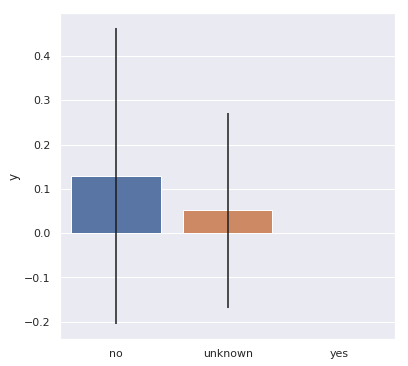

In [0]:
sns.set(rc={'figure.figsize':(6,6)})
sns.barplot(np.sort(data['default'].unique()), data.groupby('default')['y'].mean(), yerr = data.groupby('default')['y'].std())

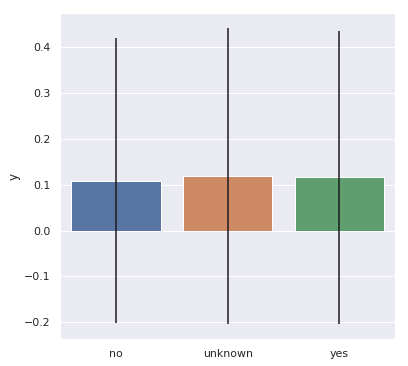

In [0]:
sns.barplot(np.sort(data['housing'].unique()), data.groupby('housing')['y'].mean(), yerr = data.groupby('housing')['y'].std())

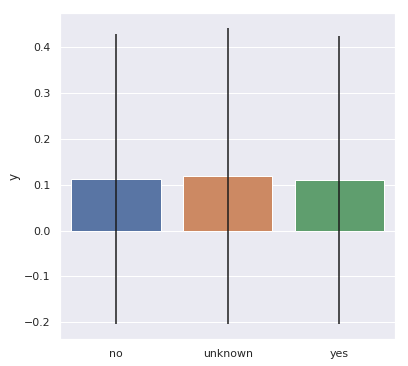

In [0]:
sns.barplot(np.sort(data['loan'].unique()), data.groupby('loan')['y'].mean(),yerr = data.groupby('loan')['y'].std())

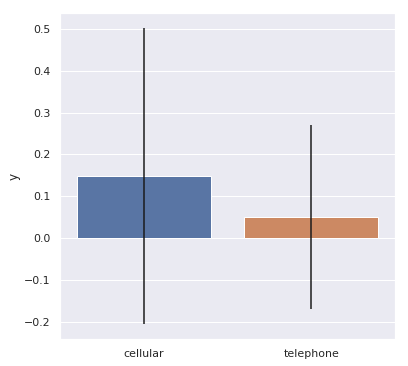

In [0]:
sns.barplot(np.sort(data['contact'].unique()), data.groupby('contact')['y'].mean(), yerr = data.groupby('contact')['y'].std())

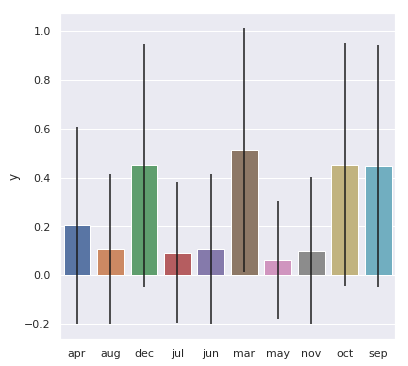

In [0]:
sns.barplot(np.sort(data['month'].unique()), data.groupby('month')['y'].mean(), yerr = data.groupby('month')['y'].std())

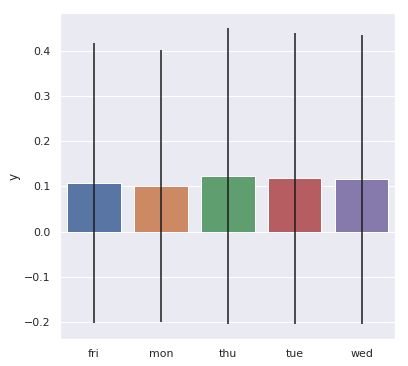

In [0]:
sns.barplot(np.sort(data['day_of_week'].unique()), data.groupby('day_of_week')['y'].mean(), yerr = data.groupby('day_of_week')['y'].std())

In [0]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# imp = IterativeImputer(max_iter=10, random_state=0, missing_values='unknown')
# imp.fit(X1)


In [0]:
y = data['y']
X1 = data.iloc[:,11:-1]
X1 = X1.drop(['poutcome'], axis =1 )
X1

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,94,2,999,0,1.4,93.918,-42.7,4.960,5228.1
1,116,4,999,0,-1.8,92.893,-46.2,1.244,5099.1
2,13,6,999,1,-1.8,92.893,-46.2,1.354,5099.1
3,94,5,999,0,1.4,93.918,-42.7,4.961,5228.1
4,344,2,999,0,1.1,93.994,-36.4,4.860,5191.0
5,727,2,999,0,-1.8,93.075,-47.1,1.405,5099.1
6,115,3,999,0,-1.8,92.893,-46.2,1.354,5099.1
7,201,2,999,0,1.1,93.994,-36.4,4.857,5191.0
8,93,2,999,0,1.1,93.994,-36.4,4.857,5191.0
9,174,7,999,0,1.4,93.918,-42.7,4.962,5228.1


In [0]:
log = LogisticRegression()

k_predictions = cross_val_predict(log, X1, y, cv=200)

cm = confusion_matrix(k_predictions, y)

TypeError: ignored

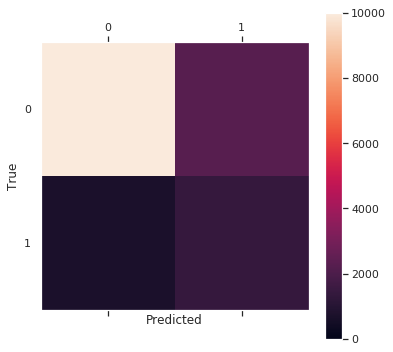

In [0]:
labels = [0,1]
cm = confusion_matrix(k_predictions, y)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, vmin=0, vmax=10000)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()